Return an SVG from d3-cloud rendering?



In [ ]:
var execSync = require('child_process').execSync;
try {
    require.resolve('d3-node');
} catch (e) {
    execSync('npm install "d3-node');
}

var D3Node = require('d3-node');
var d3n = new D3Node(); // initializes D3 with container element 
var d3 = d3n.d3;

var margin = {top: 20, right: 20, bottom: 30, left: 50},
    width = 960 - margin.left - margin.right,
    height = 500 - margin.top - margin.bottom;

var fill = d3.scaleOrdinal(d3.schemeCategory20);

function drawD3Cloud(wordCount) {
    d3n.createSVG(width + margin.left + margin.right,
                        height + margin.top + margin.bottom)
        .append("g")
        .attr("transform",
              "translate(" + (margin.left + width / 2) + "," + (margin.top + height / 2) + ")")
        .selectAll("text")
        .data(wordCount)
        .enter().append("text")
        .style("font-size", function(d) { return d.size + "px"; })
        .style("font-family", "Impact")
        .style("fill", function(d, i) { return fill(i); })
        .attr("text-anchor", "middle")
        .attr("transform", function(d) {
             return "translate(" + [d.x, d.y] + ")rotate(" + d.rotate + ")";
        })
        .text(function(d) { return d.text; });
    
    return d3n.svgString();
};
drawD3Cloud;


Create a word-cloud from text and size values?



In [ ]:
var execSync = require('child_process').execSync;
try {
    require.resolve('d3-cloud');
    require.resolve('canvas');
} catch (e) {
    execSync('npm install "github:gulpjs/gulp.git#4.0" gulp-tap d3-node d3-cloud canvas');
}

var cloud = require('d3-cloud');
var Canvas = require("canvas");

var d3CloudToSVG = (wordCount) => {
    return new Promise(resolve => {
        cloud()
            .canvas(function() { return new Canvas(1, 1); })
            .size([width, height])
            .words(wordCount)
            .padding(0)
            .rotate(function() { return ~~(Math.random() * 120) - 60; })
            .font("Impact")
            .fontSize(function(d) { return d.size; })
            .on("end", function (wordCount) {
                resolve(drawD3Cloud(wordCount));
            })
            .start();
    });
};
d3CloudToSVG;


Display a long tree?


In [11]:
// source: https://github.com/rangle/augury/blob/dev/src/frontend/components/router-tree/router-tree.ts
var D3Node = require('d3-node');
var d3n = new D3Node(); // initializes D3 with container element 
var d3 = d3n.d3;

var margin = {top: 25, right: 25, bottom: 25, left: 25},
    width = 960 - margin.left - margin.right,
    height = 500 - margin.top - margin.bottom;

var tree = d3.tree()
    .nodeSize([25, 150]);

var fill = d3.scaleOrdinal(d3.schemeCategory20);

var d3TreeToSVG = (routes) => {
    
    var svg = d3n.createSVG(width + margin.left + margin.right,
                            height + margin.top + margin.bottom)
    var g = svg.append("g");

    // Compute the new tree layout.

    var root = {
      name: 'root',
      children: routes,
      hash: null,
      path: null,
      specificity: null,
      handler: null,
      data: {},
      isAux: false,
    };

    var nodes = tree(d3.hierarchy(
      (root.children.length === 0 || root.children.length > 1) ? root : root.children[0], d => d.children));

    g.selectAll('.link')
      .data(nodes.descendants().slice(1))
      .enter().append('path')
        .attr('class', 'link')
        .attr('d', d => `
            M${d.y},${d.x}
            C${(d.y + d.parent.y) / 2},
              ${d.x} ${(d.y + d.parent.y) / 2},
              ${d.parent.x} ${d.parent.y},
              ${d.parent.x}`);

    // Declare the nodes
    var node = g.selectAll('g.node')
      .data(nodes.descendants())
      .enter().append('g')
      .attr('class', 'node')
    .style("fill", function(d, i) { return fill(i); })
    //  .on('mouseover', n => this.onRollover(n.data))
    //  .on('mouseout', n => this.onRollover(n.data))
      .attr('transform', d => `translate(${d.y},${d.x})`);

    node.append('circle')
      .attr('class', d => (d.data).isAux ? 'node-aux-route' : 'node-route')
      .attr('r', 6);

    node.append('text')
      .attr('x', (d) => d.children ? -13 : 13)
      .attr('dy', '.35em')
      .attr('text-anchor', (d) => d.children ? 'end' : 'start')
      .text(d => (d.data).name)
      .attr('class', 'monospace');

    // reset transform
    g.attr('transform', 'translate(0, 0)');

    g.attr("transform",
        "translate(" + (margin.left + width / 2) + "," + (margin.top + height / 2) + ")")

    return d3n.svgString();
};
d3TreeToSVG;


[Function: d3TreeToSVG]

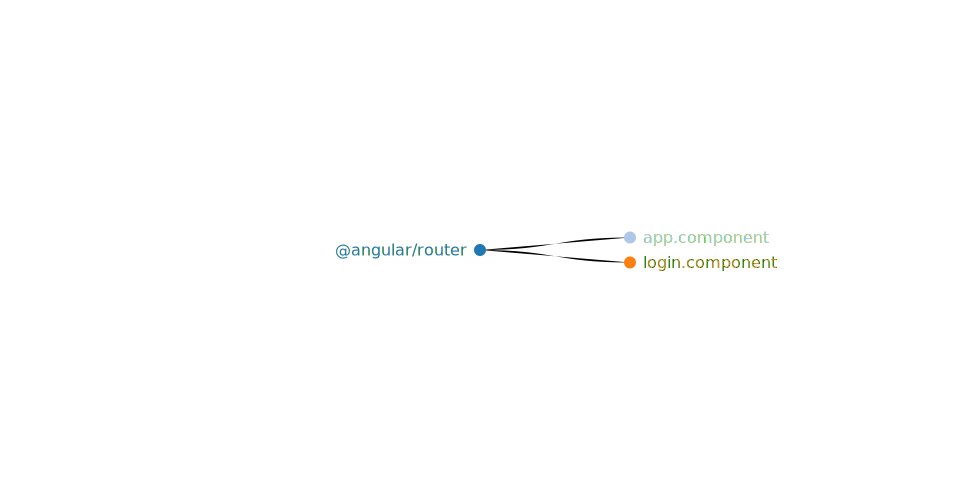

In [12]:

$$.svg(d3TreeToSVG([
    {
        name: '@angular/router',
        children: [
            {
                name: 'app.component'
            },
            {
                name: 'login.component'
            }
        ]
    }
]));
